In [1]:
import pathlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import torch
import matplotlib.ticker as plticker

# this causes the notebook to automagically
# reload the "my_figures.py" module if code has changed in there.


%load_ext autoreload
%autoreload 2
import my_figures as mf

In [10]:
experiments = {
    "ADAM" : mf.MNIST_LENET_300_100_Experiment(pathlib.Path('open_lth_data/experiment_ADAM/replicate_1')),
    "Momentum" : mf.MNIST_LENET_300_100_Experiment(pathlib.Path('open_lth_data/experiment_Momentum/replicate_1')),
    "SGD" : mf.MNIST_LENET_300_100_Experiment(pathlib.Path('open_lth_data/experiment_SGD/replicate_1')),
    }

experiment = experiments["Momentum"]

/var/folders/9n/yxn6g0xn02q48jb1vzdss0hm0000gn/T/ipykernel_2032/3273529498.py:23: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


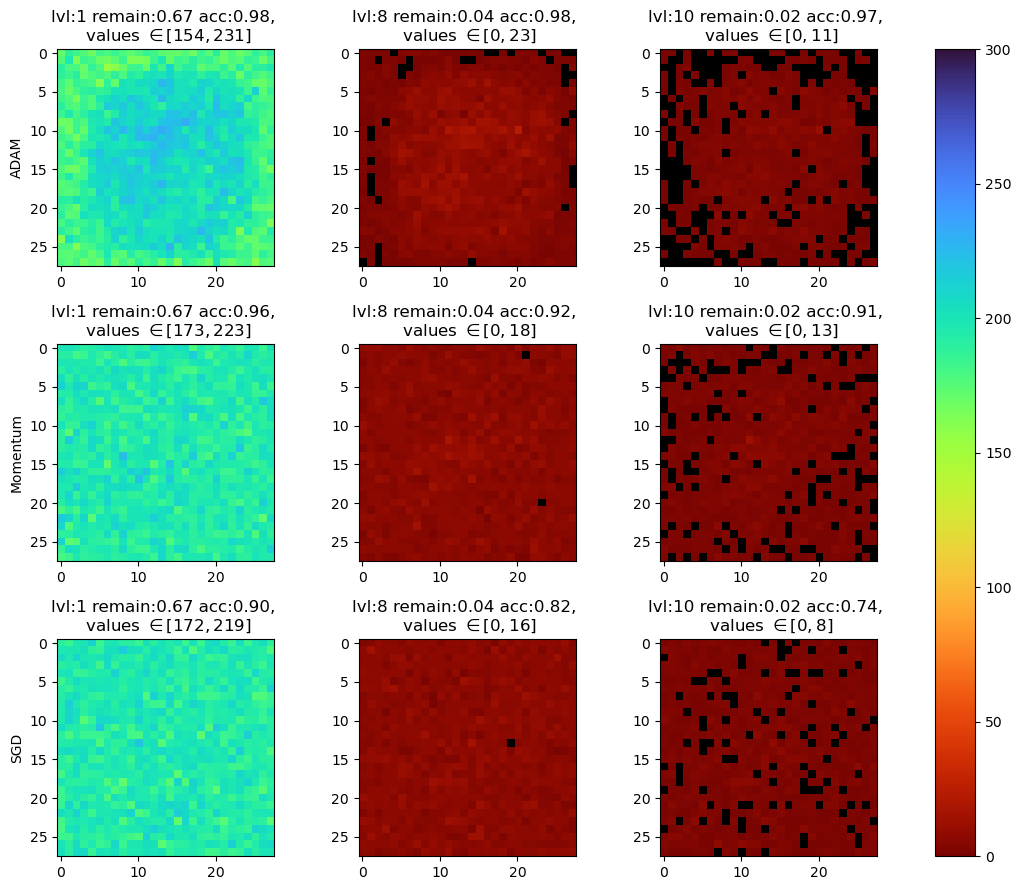

In [11]:
levels= [1,8,10]

fig, ax_generator, axs = mf.plotgrid(9, 3, (4,3))

# colormap
cmap = mpl.colormaps.get_cmap("turbo").copy().reversed()
cmap.set_bad(color="k", alpha=1)

for name, experiment in experiments.items():
    # populate grid with plots
    for level, ax in zip(levels, ax_generator):

        if level == levels[0]:
            ax.set_ylabel(name, rotation=90, size='medium')

        im = mf.find_dead_features(
            experiment.weights(level=level, layer=0),
            (28,28), 
            ax,
            title=mf.std_label(level, experiment),
            cmap=cmap
        )
fig.tight_layout()
fig.colorbar(
        im,
        ax=axs,
        shrink=1.0,
        location="right"
)

3


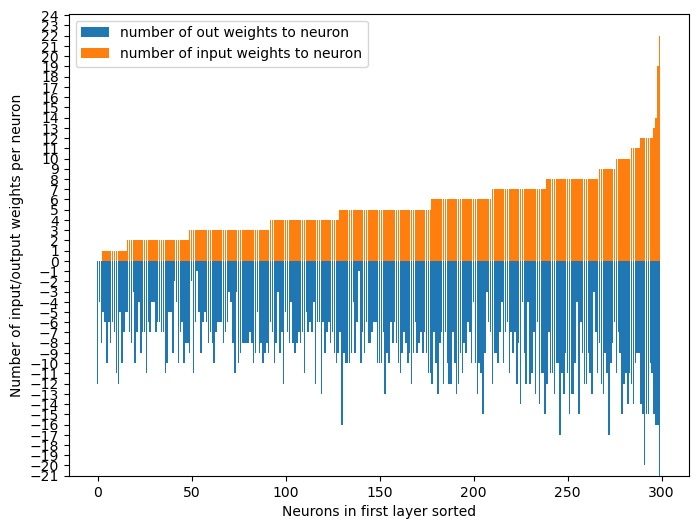

In [18]:
loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
experiment = experiments["Momentum"]

level=10
X = experiment.weights(level=level, layer=0)
Y = experiment.weights(level=level, layer=1)

weights_in_per_neuron = torch.count_nonzero(X, dim=1)
weights_out_per_neuron = torch.count_nonzero(Y, dim=0)
idc = torch.argsort(weights_in_per_neuron)
k = len(idc)
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(torch.arange(k),
       weights_out_per_neuron[idc][:k], 
       bottom=-weights_out_per_neuron[idc][:k],
       label="number of out weights to neuron"
)
print((weights_in_per_neuron[idc][:k] == 0).sum().item())
ax.bar(torch.arange(k),weights_in_per_neuron[idc][:k], label="number of input weights to neuron")
ax.set_xlabel("Neurons in first layer sorted")
ax.set_ylabel("Number of input/output weights per neuron")
# ax.xaxis.set_ticks(torch.arange(max(Y), max(X)+1, 1))
ax.yaxis.set_major_locator(loc)
ax.legend()